In [1]:
% matplotlib inline

from __future__ import division

import numpy as np 
import pandas as pd 

import tweepy
from nltk.tokenize import TweetTokenizer

import re
from collections import Counter
from nltk.tokenize import TweetTokenizer

import json
import os

## Path Initialization for Google Colab

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
! ls
%cd '/content/drive/My Drive/Colab Notebooks/Summer 2020/Project-X/'
! ls

drive  sample_data
/content/drive/My Drive/Colab Notebooks/Summer 2020/Project-X
 Data_Utilities.py			  README.md
'Other notebooks'			  Research
'Politician Embedding Extraction.ipynb'   Tweets
 __pycache__				  twitter_credentials.json


## Adding Github Functionality to Collab

In [70]:
! git status

On branch master
Your branch is up to date with 'origin/master'.

nothing to commit, working tree clean


In [68]:
! git config --global user.email "tg1482@stern.nyu.edu"
! git config --global user.name "tg1482"
! git status
! git add .
! git commit -m "Updating all files"
! git push

On branch master
Your branch is ahead of 'origin/master' by 3 commits.
  (use "git push" to publish your local commits)

nothing to commit, working tree clean
On branch master
Your branch is ahead of 'origin/master' by 3 commits.
  (use "git push" to publish your local commits)

nothing to commit, working tree clean
Counting objects: 51, done.
Delta compression using up to 2 threads.
^C


## Functions to Call new/old tweets

In [4]:
def tweets_call(twitter_handle):

    with open('twitter_credentials.json') as cred_data:
            info = json.load(cred_data)
    consumer_key = info['CONSUMER_KEY']
    consumer_secret = info['CONSUMER_SECRET']
    access_key = info['ACCESS_KEY']
    access_secret = info['ACCESS_SECRET']
    auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
    auth.set_access_token(access_key, access_secret)
    api = tweepy.API(auth)
    
    try:
      tweets = get_tweets(twitter_handle)
      most_recent_tweet = tweets.iloc[0][0] + 1
      tweets_bunch = 'init'
      new_tweets = []

      while len(tweets_bunch) > 0:
        tweets_bunch = api.user_timeline(screen_name = twitter_handle, count = 200, since_id = most_recent_tweet, tweet_mode = "extended")
        new_tweets.extend(tweets_bunch)
        new_num = len(new_tweets)
        print ('...{a} tweets have been downloaded for {b}'.format(a = new_num, b = twitter_handle))
        try: 
          most_recent_tweet = new_tweets[0].id + 1
        except IndexError:
          return
        
      outtweets = [[tweet.id, tweet.created_at, tweet.full_text] for tweet in new_tweets]
      df = pd.concat([pd.DataFrame(outtweets, columns=['id', 'created_at', 'text']), tweets], ignore_index=True)

    except FileNotFoundError:
      new_tweets = api.user_timeline(screen_name = twitter_handle, count = 200, tweet_mode = "extended")
      new_num = len(new_tweets)
      print ('...{a} tweets have been downloaded for {b}'.format(a = new_num, b = twitter_handle))
      outtweets = [[tweet.id_str, tweet.created_at, tweet.full_text] for tweet in new_tweets]
      df = pd.DataFrame(outtweets, columns=['id', 'created_at', 'text'])

    df.to_csv('Tweets/' + twitter_handle + '_tweets.csv', index=False, encoding = 'utf8')
            
def get_tweets(twitter_handle):
    tweet_data = pd.read_csv('Tweets/' + twitter_handle + '_tweets.csv', encoding = 'utf-8')
    tweet_data = tweet_data.dropna()
    return tweet_data

def get_old_tweets(twitter_handle, n=200):

    with open('twitter_credentials.json') as cred_data:
            info = json.load(cred_data)
    consumer_key = info['CONSUMER_KEY']
    consumer_secret = info['CONSUMER_SECRET']
    access_key = info['ACCESS_KEY']
    access_secret = info['ACCESS_SECRET']
    auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
    auth.set_access_token(access_key, access_secret)
    api = tweepy.API(auth)
    
    try:
      tweets = get_tweets(twitter_handle)
      first_tweet = tweets.iloc[-1][0] - 1
      new_tweets = []
      num = 0

      while num <= n:
        tweets_bunch = api.user_timeline(screen_name = twitter_handle, count = n - num, max_id = first_tweet, tweet_mode = "extended")
        new_tweets.extend(tweets_bunch)
        new_num = len(new_tweets)
        print ('...{a} tweets have been downloaded for {b}'.format(a = new_num, b = twitter_handle))
        try: 
          first_tweet = new_tweets[-1].id + 1
        except IndexError:
          return
        num += new_num
        
      outtweets = [[tweet.id, tweet.created_at, tweet.full_text] for tweet in new_tweets]
      df = pd.concat([tweets, pd.DataFrame(outtweets, columns=['id', 'created_at', 'text'])], ignore_index=True)
      df.to_csv('Tweets/' + twitter_handle + '_tweets.csv', index=False, encoding = 'utf8')

    except FileNotFoundError:
        tweets_call(twitter_handle)


# tweets = get_tweets('SenBooker')

In [7]:
reps = ["ChuckGrassley", "jaredpolis", "clairecmc", "GovChristie", "jahimes", "MayorMark", "GovGaryJohnson", "RepSteveIsrael", "SteveWorks4You", "JerryBrownGov", "PeterRoskam", "RepCohen", 
               "AndrewYang", "BenSasse", "BernieSanders", "BorisJohnson", "CoryBooker", "JeffFlake", "JoeBiden", "KamalaHarris", "MittRomney", "PeteButtigieg", "SenBooker", "SenKamalaHarris", 
               "SenSanders", "SenTedCruz", "SenWarren", "SenatorRomney", "TedCruz", "ewarren", "mcuban", "mike_pence", "realDonaldTrump"]

In [8]:
for rep in reps:
  tweets_call(rep)
  # get_old_tweets(rep, 200)

...11 tweets have been downloaded for ChuckGrassley
...11 tweets have been downloaded for ChuckGrassley
...12 tweets have been downloaded for jaredpolis
...12 tweets have been downloaded for jaredpolis
...21 tweets have been downloaded for clairecmc
...21 tweets have been downloaded for clairecmc
...0 tweets have been downloaded for GovChristie
...1 tweets have been downloaded for jahimes
...1 tweets have been downloaded for jahimes
...7 tweets have been downloaded for MayorMark
...7 tweets have been downloaded for MayorMark
...0 tweets have been downloaded for GovGaryJohnson
...3 tweets have been downloaded for RepSteveIsrael
...3 tweets have been downloaded for RepSteveIsrael
...0 tweets have been downloaded for SteveWorks4You
...1 tweets have been downloaded for JerryBrownGov
...1 tweets have been downloaded for JerryBrownGov
...0 tweets have been downloaded for PeterRoskam
...7 tweets have been downloaded for RepCohen
...7 tweets have been downloaded for RepCohen
...68 tweets have 

## Downloaded tweets till here. Building Language Model now.

In [9]:
from fastai.text import *

data_path = Path('Tweets')
# model_path = Path(os.getcwd())
bs = 48

In [10]:
train_df = pd.DataFrame()
for rep in reps:
  rep_df = get_tweets(rep)
  rep_df['rep'] = [rep]*len(rep_df)
  train_df = pd.concat([rep_df, train_df], ignore_index=True)

In [11]:
train_df.text[3]

'“COVID-19 (China Virus) Death Rate PLUNGES From Peak In U.S.” A Tenfold Decrease In Mortality. The Washington Times @WashTimes  Valerie Richardson.  We have the lowest Mortality Rate in the World. The Fake News should be reporting these most important of facts, but they don’t!'

In [12]:
train_df.text = train_df.text.apply(lambda x: re.sub(u'(https?:)\/\/\S*', u'', x))    # Removing 'https://'
train_df.text = train_df.text.apply(lambda x: re.sub(u'RT', u'', x))                  # Changing 'RT' to ''
train_df.text = train_df.text.apply(lambda x: re.sub(u'\&amp\;', u'and', x))          # Changing '&amp;' to 'and'

Need to find a way to mark a tweet as a RT or remove the RT altogether since the RT may not necessarily be a reflection of the tweeter's opinion but could also be a critique which not be correctly reflected.

In [13]:
data_lm = (TextList.from_df(path = data_path, df = train_df, cols = 2)
            .split_by_rand_pct(0.1)
            .label_for_lm()           
            .databunch(bs=bs))
data_lm.save('data_lm.pk1')
# data_lm = load_data(data_path, 'data_lm.pkl')

In [14]:
data_lm.show_batch()

idx,text
0,"death xxmaj rate xxup xxunk xxmaj from xxmaj peak xxmaj in xxup u.s. ” a xxmaj tenfold xxmaj decrease xxmaj in xxmaj mortality . xxmaj the xxmaj washington xxmaj times @washtimes xxmaj valerie xxmaj richardson . xxmaj we have the lowest xxmaj mortality xxmaj rate in the xxmaj world . xxmaj the xxmaj fake xxmaj news should be reporting these most important of facts , but they do n’t !"
1,"by xxmaj elizabeth ( xxmaj pocahontas ) xxmaj warren . xxmaj it is unfair and does n’t treat xxmaj native xxmaj americans equally ! xxbos xxup great xxup news xxup for xxup ohio ! xxmaj just spoke to xxmaj mary xxmaj xxunk , xxup ceo of xxmaj general xxmaj motors , who informed me that , subject to a xxup uaw agreement etc . , xxup gm will be selling"
2,"office , he 'll be fighting for xxup you , xxmaj virginia . xxmaj thanks for your support in xxmaj ashland tonight ! xxbos @realdonaldtrump : xxmaj we must bring the truth directly to hard - working xxmaj americans who want to take our country back . # bigleaguetruth \n xxbos .@realdonaldtrump promises action on cybersecurity to protect xxmaj americans from cyber - crime and national security threats xxbos"
3,xxbos @govpencein : xxmaj had a great time helping out on one of the 5 volunteer projects going on today at xxmaj xxunk xxmaj park # dayofservice xxbos @govpencein : xxmaj presented outgoing xxmaj exec xxmaj dir of xxunk xxmaj jamal xxmaj smith w / a xxmaj sagamore . xxmaj thx xxmaj jamal for your service ! # dayofservice xxbos @indgop : xxmaj over 600 jobs with xxmaj allied xxmaj
4,medicaid and the xxup aca are already means tested systems that the candidates are looking to replicate . xxmaj so i do n’t think that would be an issue xxbos @drmistercody @johnlegend @ewarren xxmaj where did i say it was two separate systems ? i just asked i should pay directly xxbos @johnlegend @ewarren xxmaj of course they would . xxmaj but my taxes and the total wealth tax is


## Language Model Training on Twitter Data

In [15]:
learn_lm = language_model_learner(data_lm, AWD_LSTM, drop_mult=0.3)

epoch,train_loss,valid_loss,accuracy,time


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.
Min numerical gradient: 2.29E-02
Min loss divided by 10: 2.09E-02


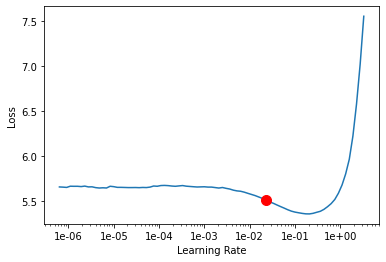

In [16]:
learn_lm.lr_find()
learn_lm.recorder.plot(suggestion=True)
min_grad_lr = learn_lm.recorder.min_grad_lr

In [17]:
learn_lm.fit_one_cycle(1, slice(1e-2,1e-1), moms=(0.8,0.7))
learn_lm.save('learn_lm_v1')

epoch,train_loss,valid_loss,accuracy,time
0,4.354201,4.111833,0.293627,01:15


In [18]:
learn_lm.freeze_to(-2)
learn_lm.fit_one_cycle(1, slice(1e-3,1e-1), moms=(0.8,0.7))
learn_lm.save('learn_lm_v2')

epoch,train_loss,valid_loss,accuracy,time
0,4.004311,3.862680,0.317394,01:17


epoch,train_loss,valid_loss,accuracy,time


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


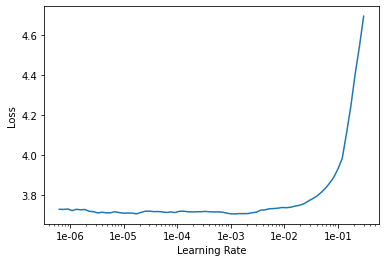

In [19]:
learn_lm.unfreeze()
learn_lm.lr_find()
learn_lm.recorder.plot(skip_end=15)

In [20]:
learn_lm.unfreeze()
learn_lm.fit_one_cycle(5, slice(1e-4,1e-3), moms=(0.8,0.7))
learn_lm.save('learn_lm_v3')

epoch,train_loss,valid_loss,accuracy,time
0,3.696088,3.822271,0.322462,01:30
1,3.600068,3.748165,0.331207,01:30
2,3.499387,3.711581,0.336743,01:30
3,3.441104,3.699124,0.338278,01:30
4,3.414751,3.701276,0.338414,01:30


epoch,train_loss,valid_loss,accuracy,time


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


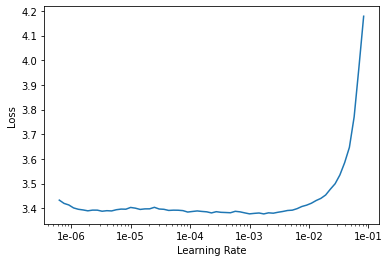

In [21]:
learn_lm.lr_find()
learn_lm.recorder.plot(skip_end=15)

In [22]:
TEXT = "Guns should be banned "
N_WORDS = 40
N_SENTENCES = 2

In [23]:
print("\n".join(learn_lm.predict(TEXT, N_WORDS, temperature=0.75) for _ in range(N_SENTENCES)))

Guns should be banned  in California . It 's time to take it in the right direction . No one should have to face discrimination , or putting food on the table . It is time to make sure we
Guns should be banned  in America , period . It should be a step closer to getting our resources done . xxbos The American people deserve better . Proud to stand with you in this fight and we need


In [24]:
learn_lm.save('learn_lm_final')
learn_lm.save_encoder('fine_tuned_enc')

## Classification of Tweets by Rep to extract Rep-Embedding

Trying to classify tweets into 

In [25]:
from collections import Counter

Counter(train_df.rep)

Counter({'AndrewYang': 3605,
         'BenSasse': 3227,
         'BernieSanders': 3457,
         'BorisJohnson': 2077,
         'ChuckGrassley': 1240,
         'CoryBooker': 3425,
         'GovChristie': 1202,
         'GovGaryJohnson': 1221,
         'JeffFlake': 2866,
         'JerryBrownGov': 1215,
         'JoeBiden': 2133,
         'KamalaHarris': 3462,
         'MayorMark': 1222,
         'MittRomney': 1928,
         'PeteButtigieg': 3463,
         'PeterRoskam': 1220,
         'RepCohen': 1217,
         'RepSteveIsrael': 1225,
         'SenBooker': 3432,
         'SenKamalaHarris': 3452,
         'SenSanders': 3464,
         'SenTedCruz': 3476,
         'SenWarren': 3451,
         'SenatorRomney': 500,
         'SteveWorks4You': 1116,
         'TedCruz': 3543,
         'clairecmc': 1285,
         'ewarren': 1265,
         'jahimes': 1221,
         'jaredpolis': 1242,
         'mcuban': 1291,
         'mike_pence': 3519,
         'realDonaldTrump': 1372})

In [26]:
reps_for_clas = ["BernieSanders", "JoeBiden", "MittRomney", "SenKamalaHarris", "SenTedCruz", "SenWarren", "SenatorRomney", "mcuban", "mike_pence", "realDonaldTrump"]
df_clas = train_df.loc[train_df.rep.apply(lambda rep: rep in reps_for_clas)]

In [27]:
df_clas

,id,created_at,text,rep
0,1280649677894037509,2020-07-07 23:47:31,"We will miss GREAT Country Rocker, Charlie Dan...",realDonaldTrump
1,1280518510184144898,2020-07-07 15:06:18,,realDonaldTrump
2,1280517860725530624,2020-07-07 15:03:43,,realDonaldTrump
3,1280484878744793090,2020-07-07 12:52:40,“COVID-19 (China Virus) Death Rate PLUNGES Fro...,realDonaldTrump
4,1280384628453498880,2020-07-07 06:14:18,@TrumpStudents: ABSOLUTELY PACKED HOUSE \n\nf...,realDonaldTrump
...,...,...,...,...
51571,835209701457526784,2017-02-24 19:28:04,Now is the time for the American people to dem...,BernieSanders
51572,835172577345699840,2017-02-24 17:00:33,I believe you are entitled to justice and to e...,BernieSanders
51573,834818062339756032,2017-02-23 17:31:50,@MoveOn: .@SenSanders wants you to join him o...,BernieSanders
51574,834807788828233729,2017-02-23 16:51:01,One of the great and ongoing struggles of huma...,BernieSanders


In [29]:
# data_clas = (TextList.from_df(path = data_path, df = df_clas, cols = 2, vocab=data_lm.vocab)
#             .split_by_rand_pct(0.1)
#             .label_from_df(cols=3)           
#             .databunch(bs=bs))
# data_clas.save('data_clas.pkl')
data_clas = load_data(data_path, 'data_clas.pkl', bs=16)

In [30]:
data_clas.show_batch()

text,target
xxbos xxmaj george xxmaj floyd \n xxmaj ahmaud xxmaj arbery \n xxmaj breonna xxmaj taylor \n xxmaj michael xxmaj brown \n xxmaj trayvon xxmaj martin \n xxmaj eric xxmaj garner \n xxmaj philando xxmaj castile \n xxmaj sandra xxmaj bland \n xxmaj xxunk mcdonald \n xxmaj tamir xxmaj rice \n xxmaj jordan xxmaj davis \n xxmaj alton xxmaj sterling,SenKamalaHarris
"xxbos xxmaj absentee xxmaj ballots are fine . a person has to go through a process to get and use them . xxmaj mail - xxmaj in xxmaj voting , on the other hand , will lead to the most corrupt xxmaj election is xxup usa history . xxmaj bad things happen with xxmaj mail - xxmaj ins . xxmaj just look at xxmaj special xxmaj election in xxmaj patterson",realDonaldTrump
xxbos xxmaj what do these corporations have in common ? \n \n xxmaj amazon \n xxmaj chevron \n xxmaj deere \n xxmaj delta \n xxmaj duke xxmaj energy \n xxmaj eli xxmaj lilly \n xxmaj xxunk \n xxmaj general xxmaj motors \n xxmaj xxunk \n xxmaj honeywell \n jetblue \n xxmaj kinder xxmaj morgan \n xxup mgm,BernieSanders
"xxbos i am at xxmaj camp xxmaj david working on many things , including xxmaj iran ! xxmaj we have a great xxmaj economy , xxmaj tariffs have been very helpful both with respect to the huge xxmaj dollars coming xxup in , and on helping to make good xxmaj trade xxmaj deals . xxmaj the xxmaj dow heading to xxup best xxmaj june in 80 years ! xxmaj stock",realDonaldTrump
"xxbos xxmaj finally , we arrived at xxmaj june 23 , 2016 , when the xxmaj united xxmaj states xxmaj supreme xxmaj court said that those xxmaj prop 8 proponents had no standing . xxmaj and , on xxmaj june 28 , 2013 , i was back at xxmaj san xxmaj francisco xxmaj city xxmaj hall where i had the honor of performing the marriage of xxmaj ms. xxmaj kris",SenKamalaHarris


In [31]:
learn = text_classifier_learner(data_clas, AWD_LSTM, drop_mult=0.5)
learn.load_encoder('fine_tuned_enc')

RNNLearner(data=TextClasDataBunch;

Train: LabelList (22122 items)
x: TextList
xxbos xxmaj we will miss xxup great xxmaj country xxmaj xxunk , xxmaj charlie xxmaj daniels , who passed away yesterday in xxmaj xxunk , xxmaj tennessee . xxmaj my condolences to his wife xxmaj hazel , and their family . xxmaj charlie is in my thoughts and prayers . i love his music ! # xxunk,xxbos,xxbos,xxbos “ xxup covid-19 ( xxmaj china xxmaj virus ) xxmaj death xxmaj rate xxup xxunk xxmaj from xxmaj peak xxmaj in xxup u.s. ” a xxmaj tenfold xxmaj decrease xxmaj in xxmaj mortality . xxmaj the xxmaj washington xxmaj times @washtimes xxmaj valerie xxmaj richardson . xxmaj we have the lowest xxmaj mortality xxmaj rate in the xxmaj world . xxmaj the xxmaj fake xxmaj news should be reporting these most important of facts , but they do n’t !,xxbos xxunk : xxup absolutely xxup packed xxup house 
 
  for xxunk and @richardgrenell ’s speech today leading up to @donaldjtrumpjr , @kimguilfoyle …
y: CategoryList
real

epoch,train_loss,valid_loss,accuracy,time


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


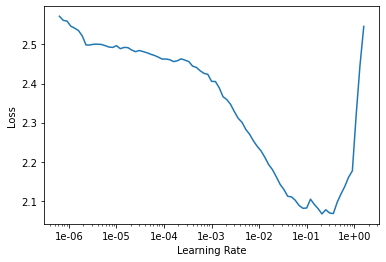

In [32]:
learn.lr_find()
learn.recorder.plot()

In [33]:
learn.fit_one_cycle(2, slice(1e-3,1e-1), moms=(0.8,0.7))
learn.save('first-large')

epoch,train_loss,valid_loss,accuracy,time
0,1.559987,1.361924,0.532764,00:14
1,1.359444,1.115973,0.623525,00:14


epoch,train_loss,valid_loss,accuracy,time


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


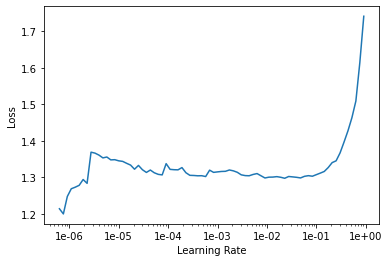

In [34]:
learn.freeze_to(-2)
learn.lr_find()
learn.recorder.plot()

In [35]:
learn.freeze_to(-2)
learn.fit_one_cycle(1, 1e-3/(2.6**4), moms=(0.8,0.7))
learn.save('second-large')

epoch,train_loss,valid_loss,accuracy,time
0,1.336571,1.108279,0.628409,00:17


In [36]:
learn.freeze_to(-3)
learn.fit_one_cycle(1, 5e-3/(2.6**4), moms=(0.8,0.7))
learn.save('third-large')

epoch,train_loss,valid_loss,accuracy,time
0,1.232196,1.053782,0.644689,00:24


epoch,train_loss,valid_loss,accuracy,time


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


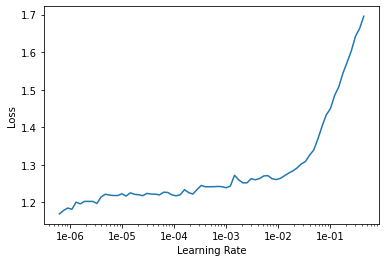

In [37]:
learn.lr_find()
learn.recorder.plot()

In [38]:
learn.unfreeze()
learn.fit_one_cycle(2, slice(1e-3/(2.6**4),1e-3), moms=(0.8,0.7))
learn.save('fourth-large')

epoch,train_loss,valid_loss,accuracy,time
0,1.157941,0.932502,0.676842,00:31
1,1.054783,0.888863,0.697192,00:35


In [39]:
learn.unfreeze()
learn.fit_one_cycle(2, slice(1e-3/(2.6**4),1e-3), moms=(0.8,0.7))
learn.save('fifth-large')

epoch,train_loss,valid_loss,accuracy,time
0,0.952451,0.790756,0.725275,00:34
1,0.936992,0.765854,0.739113,00:35


epoch,train_loss,valid_loss,accuracy,time


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


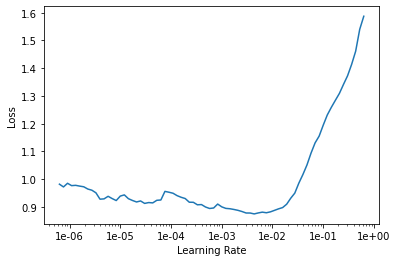

In [40]:
learn.unfreeze()
learn.lr_find()
learn.recorder.plot()

In [41]:
learn.unfreeze()
learn.fit_one_cycle(2, slice(1e-3/(2.6**4)), moms=(0.8,0.7))
learn.save('sixth-large')

epoch,train_loss,valid_loss,accuracy,time
0,0.891798,0.751351,0.746439,00:34
1,0.874652,0.754153,0.748474,00:32


epoch,train_loss,valid_loss,accuracy,time


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


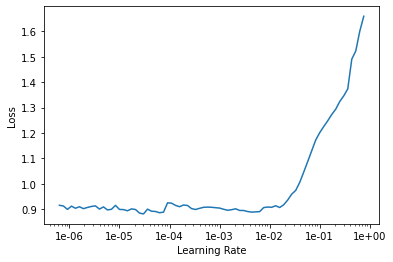

In [42]:
learn.unfreeze()
learn.lr_find()
learn.recorder.plot()

## Model Evaluation

In [43]:
interp = TextClassificationInterpretation.from_learner(learn) 

In [44]:
interp.show_top_losses(5)

Text,Prediction,Actual,Loss,Probability
xxbos,realDonaldTrump,mcuban,8.39,0.00
"xxbos @iastartingline : xxmaj an emotional moment at the racial justice rally in xxmaj xxunk , xxmaj iowa ( pop : xxunk ) when a xxunk - old student tells the crowd …",BernieSanders,mcuban,7.38,0.00
"xxbos "" xxmaj when fellow graduates fail to respect the checks and balances of government , promote individual power above country , or prize loyalty to individuals over the ideals expressed in the xxmaj constitution , it is a travesty to their oath of office . "" \n",SenTedCruz,BernieSanders,7.32,0.00
"xxbos xxmaj had great xxunk and great conversation at xxmaj tasty xxmaj cafe in xxmaj xxunk before heading to xxmaj clinton xxmaj community xxmaj college for our final event this trip . xxmaj thank you for a great few days , xxmaj iowa !",mike_pence,JoeBiden,6.72,0.00
xxbos xxunk,mcuban,SenWarren,6.54,0.00


In [45]:
interp.show_intrinsic_attention("“COVID-19 (China Virus) Death Rate PLUNGES From Peak In U.S.” A Tenfold Decrease In Mortality. The Washington Times @WashTimes  Valerie Richardson.  We have the lowest Mortality Rate in the World. The Fake News should be reporting these most important of facts, but they don’t!")

/pytorch/aten/src/ATen/native/cuda/LegacyDefinitions.cpp:19: UserWarning: masked_fill_ received a mask with dtype torch.uint8, this behavior is now deprecated,please use a mask with dtype torch.bool instead.
/pytorch/aten/src/ATen/native/cuda/LegacyDefinitions.cpp:19: UserWarning: masked_fill_ received a mask with dtype torch.uint8, this behavior is now deprecated,please use a mask with dtype torch.bool instead.


In [48]:
learn.predict("“COVID-19 (China Virus) Death Rate PLUNGES From Peak In U.S.” A Tenfold Decrease In Mortality. The Washington Times @WashTimes  Valerie Richardson.  We have the lowest Mortality Rate in the World. The Fake News should be reporting these most important of facts, but they don’t!")

(Category tensor(9),
 tensor(9),
 tensor([3.0148e-05, 3.0132e-05, 3.0280e-04, 1.8192e-04, 3.2929e-04, 3.9927e-04,
         6.8761e-05, 5.2184e-04, 1.9722e-03, 9.9616e-01]))

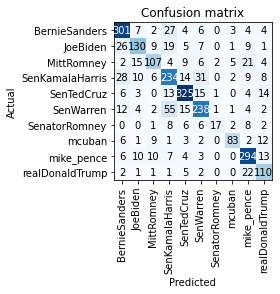

In [49]:
interp.plot_confusion_matrix()

In [50]:
learn.summary()

SequentialRNN
Layer (type)         Output Shape         Param #    Trainable 
RNNDropout           [25, 400]            0          False     
______________________________________________________________________
RNNDropout           [25, 1152]           0          False     
______________________________________________________________________
RNNDropout           [25, 1152]           0          False     
______________________________________________________________________
BatchNorm1d          [1200]               2,400      True      
______________________________________________________________________
Dropout              [1200]               0          False     
______________________________________________________________________
Linear               [50]                 60,050     True      
______________________________________________________________________
ReLU                 [50]                 0          False     
________________________________________________

In [51]:
p = np.matrix(list(learn.model.parameters())[-2].cpu().detach().numpy())

In [53]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(p)
principalDf = pd.DataFrame(data = principalComponents
             , columns = ['principal component 1', 'principal component 2'])

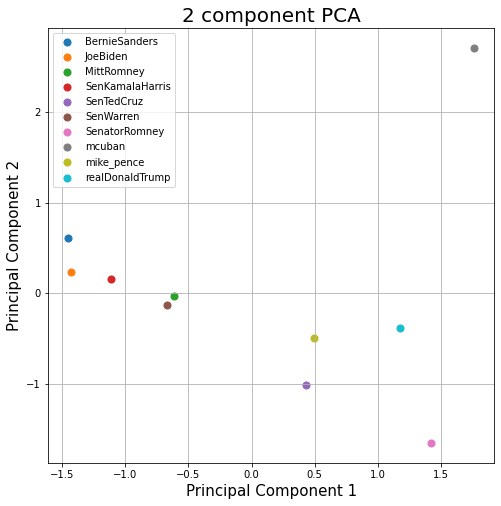

In [54]:
targets = pd.Series(["BernieSanders", "JoeBiden", "MittRomney", "SenKamalaHarris", "SenTedCruz", "SenWarren", "SenatorRomney", "mcuban", "mike_pence", "realDonaldTrump"], name = 'targets')
finalDf = pd.concat([principalDf, targets], axis = 1)
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('2 component PCA', fontsize = 20)
for target in targets:
    indicesToKeep = finalDf['targets'] == target
    ax.scatter(finalDf.loc[indicesToKeep, 'principal component 1']
               , finalDf.loc[indicesToKeep, 'principal component 2']
               , s = 50)
ax.legend(targets)
ax.grid()

It appears that the embeddings seem to be working, to the extent that we can see similar politicians clustering together!

In [ ]:
################### Further Development for Topic-based data filteration ########################

In [ ]:
def word_in_text(word, text):
    word = word.lower()
    text = text.lower()
    match = re.search(word, text)
    if match:
        return True
    return False

def word_basket_in_text(word_list, text):
    status = True
    for word in word_list:
        if type(word)==list:
            list_status = False
            for list_word in word:
                list_status = list_status or word_in_text(list_word, text)
            status = status and list_status
        else: status = status and word_in_text(word, text)
    return status

In [ ]:
# Changing &amp; to 'and'
tweets.text = tweets.text.apply(lambda x: re.sub(u'\&amp\;', u'and', x))

# extracting URLS
tweets['urls'] = tweets.text.apply(lambda x: re.findall('http\S+', x))
tweets['text_clean'] = tweets.text.apply(lambda x: re.sub(u'http\S+', u'', x)) 

# extracting @... 
tweets['mentions'] = tweets.text.apply(lambda x: re.findall(u'@(\w+)', x))

# extracting hashtags
tweets['hashtags'] = tweets.text.apply(lambda x: re.findall(u'#(\w+)', x))
tweets.text_clean = tweets.text_clean.apply(lambda x: re.sub(u'#', u'', x))

# Binary for Re-Tweets
tweets['retweet'] = tweets.text.apply(lambda x: 1 if len(re.findall(u'RT', x))>0 else 0)
tweets.text_clean = tweets.text_clean.apply(lambda x: re.sub(u'RT', u'', x))

In [ ]:
Healthcare = [u'care','affordable care act', u'medicare', u'obamacare',  u'benefits', u'opioid', u'abortion', u'medicaid', u'single payer', u'medication', u'prescription', u'drugs', u'hospital', u'health', u'care']
Terrorism = [u'al', u'terror', u'sanctions', u'drone', u'oil', u'gulf', u'intelligence', u'ISIS', u'military', u'nuclear']
Economy = [u'china', u'tariff', u'mexico', u'fed', u'sec', u'interest', u'rate', u'immigration', u'debt', u'unemployment', u'growth', u'inflation', u'trade war', u'dollar', u'gdp', u'g20', u'recession', u'stock', u'market']
lgbtq = [u'gay', u'lesbian', u'pride', u'community', u'lgbt', u'same-sex', u'marriage', u'orientation', u'parade', u'stonewall', u'riot', u'civil', u'homosexual', u'queer', u'conversion']

china_tariffs = ['china', 'tariff']
safe_abortion = ['abortion', ['safe', 'legal']]
abortion_ban = ['abortion', ['ban', 'restrictions', 'extreme']]
affordable_care = ['health', ['affordable', 'obamacare', 'medicare', 'care']]
medicare = ['MedicareForAll', ['Medicare']] 
greennewdeal = ['greennewdeal']
lgbtq_marriage_equality_act = [['marriage', 'relationship', 'relationships', 'couple', 'couples'], ['gay', 'lesbian', 'pride', 'orientation']]


In [ ]:
# Final List

# Healthcare
affordable_care = ['health', ['affordable', 'obamacare', 'medicare', 'care']]
medicare = ['medicare'] 
safe_abortion = ['abortion', ['safe', 'legal']]
abortion_ban = ['abortion', ['ban', 'restrictions', 'extreme']]

# Education
education_for_all = ['education', ['afford', 'free']]
student_loans = ['student', ['cancel', 'loans', 'debt']]

# Immigration
immigration = ['immigration', ['policy', 'policies', 'mexico', 'illegal', 'undocumented', 'border']]
asylum = ['border', ['detention', 'families', 'family', 'asylum']]

# Guns
Gun_Laws = ['gun', ['semi-automatic', 'assault', 'shooting', 'reform', 'open carry', 'second amendment']]

#Climate
Global_Warming = ['climate', ['global warming', 'emissions', 'pollution', 'accord', 'fossil', 'fuel', 'oil']]
GND = [['net-zero', 'net zero', 'carbon', 'green']]
       


In [ ]:
all_tweets = ''
for tweet in tweets['text']:
    if word_basket_in_text(GND, tweet):
        print('-------')
        tweet = re.sub(u'\&amp\;', u'and', tweet)
        tweet = re.sub(u'http\S+', u'', tweet)
        tweet = re.sub(u'@(\w+)', u'', tweet)   
        tweet = re.sub(u'-', u' ', tweet) 
        print(tweet)
        all_tweets = all_tweets + ' ; ' + tweet

-------
RT : We must take bold action on climate change and create a green economy that benefits all Americans. Thank you to …
-------
RT : In NJ driving on the Turnpike with my State Director  (and his green tie) this morning—heading to a great round tabl…
-------
RT : Bob Menendez is a champion for protecting New Jersey’s beaches, coastal communities and green spaces. Today, Bob joined wi…
-------
RT : Our most vulnerable communities are disproportionately impacted by pollution + hit first and worst by climate change. Learn…
-------
                                                61. Green Latinos  opposes the Senate  health care bill
-------
                                                60. Green For All  opposes the Senate  health care bill


In [ ]:
tknzr = TweetTokenizer()
counts = Counter(tknzr.tokenize(all_tweets))
print(counts)

Counter({'the': 45, 'and': 35, '.': 34, 'our': 26, ',': 25, 'border': 25, 'to': 23, 'of': 22, ';': 21, 'immigration': 20, 'a': 15, 'I': 12, 'at': 8, 'illegal': 8, 'in': 8, 'have': 7, 'that': 7, 'wall': 7, '’': 6, 'as': 6, 'The': 6, ':': 6, 'southern': 6, 'crisis': 6, 'for': 6, 'country': 6, 'an': 5, 'want': 5, 'see': 5, 'is': 5, 'broken': 5, 'system': 5, 'secure': 5, 'people': 5, 'Texans': 4, 'agents': 4, 'human': 4, 'children': 4, 'today': 4, 'by': 4, 'humanitarian': 4, 'we': 4, 'We': 4, 'called': 4, 'building': 4, 'necessary': 4, 'step': 4, 'stopping': 4, 'flow': 4, 'into': 4, 'defending': 4, 'overwhelming': 3, 'majority': 3, 'they': 3, 'secured': 3, 'Border': 3, 'Patrol': 3, 'legal': 3, '#SecureTheBorder': 3, 'has': 3, 'security': 3, 'must': 3, 'need': 3, 'put': 3, 'catch': 3, 'release': 3, 'which': 3, 'on': 3, '>': 3, 'long': 3, 's': 3, 'who': 3, 'American': 3, 'are': 3, 'Texas': 2, 'supported': 2, 'championed': 2, 'traffickers': 2, 'drug': 2, 'produced': 2, 'RT': 2, 'A': 2, 'exist